# Problem Statement: Analyze the geographical distribution of vehicle advertisements to understand demand and supply patterns.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns
# first imported all libraries

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Kuldeep'

In [4]:
os.chdir("C:/Users/Kuldeep/Desktop/cdac mumbai new")

In [5]:
df=pd.read_csv("vehicles.csv")

In [6]:
df.shape

(258888, 26)

In [7]:
#check for null vlaues
df.isnull().sum()

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

In [8]:
df=df.drop(['details','member_since'],axis=1)

In [9]:
#dropping all remaining null values
df=df.dropna()

In [10]:
df.isnull().sum()

ad_title                0
ad_description          0
slug                    0
title                   0
type                    0
price                   0
timestamp               0
posted_date             0
deactivation_date       0
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
properties              0
user                    0
dtype: int64

# Geographical Analysis

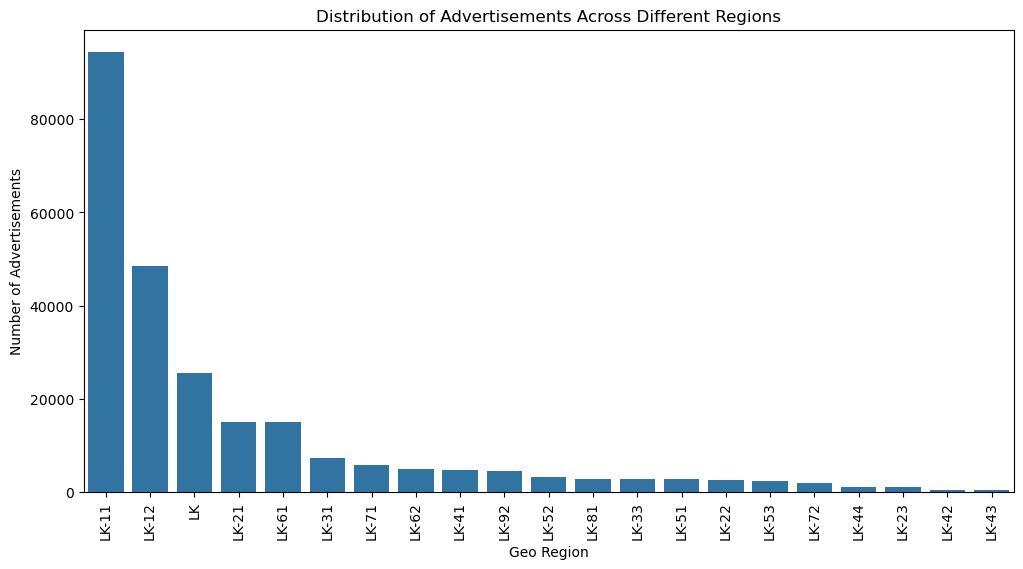

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns



# Select relevant columns
columns_of_interest = ['category', 'location', 'geo_region']

# Create a subset of the dataframe with selected columns
df_subset = df[columns_of_interest]

# Visualize the distribution of advertisements across different regions
plt.figure(figsize=(12, 6))
sns.countplot(data=df_subset, x='geo_region', order=df_subset['geo_region'].value_counts().index)
plt.title('Distribution of Advertisements Across Different Regions')
plt.xlabel('Geo Region')
plt.ylabel('Number of Advertisements')
plt.xticks(rotation=90)
plt.show()

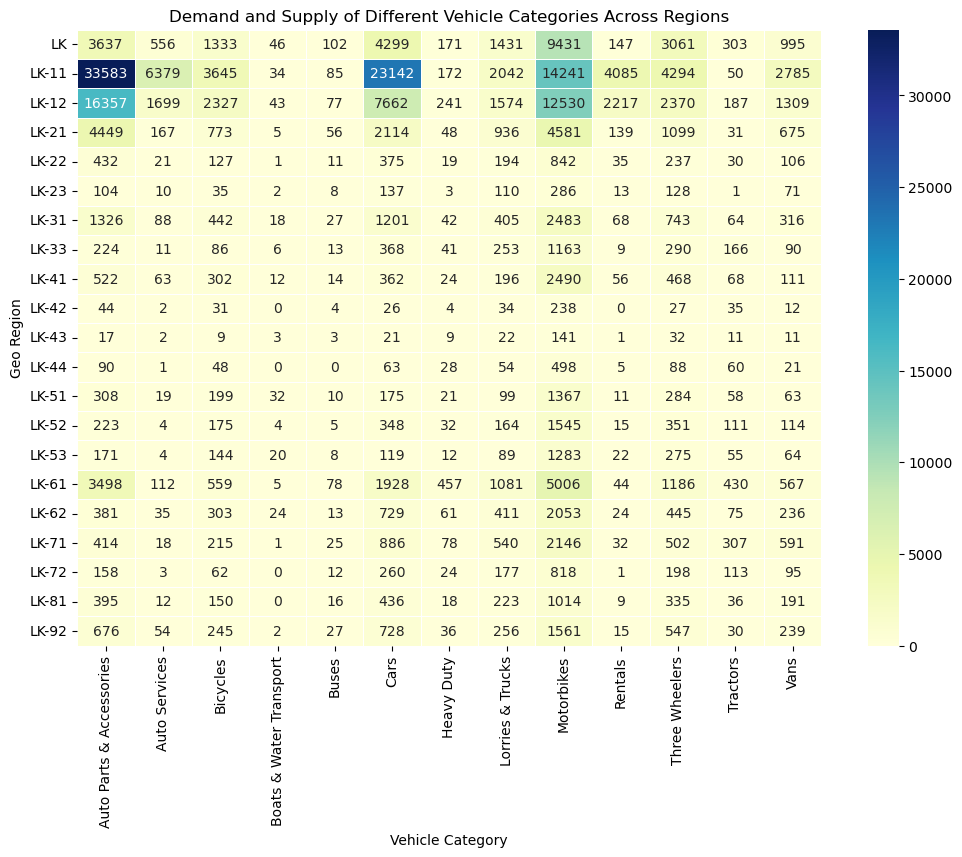

Top regions with the highest number of advertisements:
geo_region
LK-11    94537
LK-12    48593
LK       25512
LK-21    15073
LK-61    14951
LK-31     7223
LK-71     5755
LK-62     4790
LK-41     4688
LK-92     4416
Name: count, dtype: int64


In [12]:
# Identify regions with high demand and supply
# Assuming 'category' can be used to identify different types of vehicles
region_demand_supply = df_subset.groupby(['geo_region', 'category']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(region_demand_supply, cmap="YlGnBu", linewidths=.5, annot=True, fmt='d')
plt.title('Demand and Supply of Different Vehicle Categories Across Regions')
plt.xlabel('Vehicle Category')
plt.ylabel('Geo Region')
plt.show()

# Identify top regions with high demand and supply
top_regions = df_subset['geo_region'].value_counts().head(10)
print("Top regions with the highest number of advertisements:")
print(top_regions)

# Temporal Analysis:

C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_9504\1980431198.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['posted_date'].dt.to_period('M')


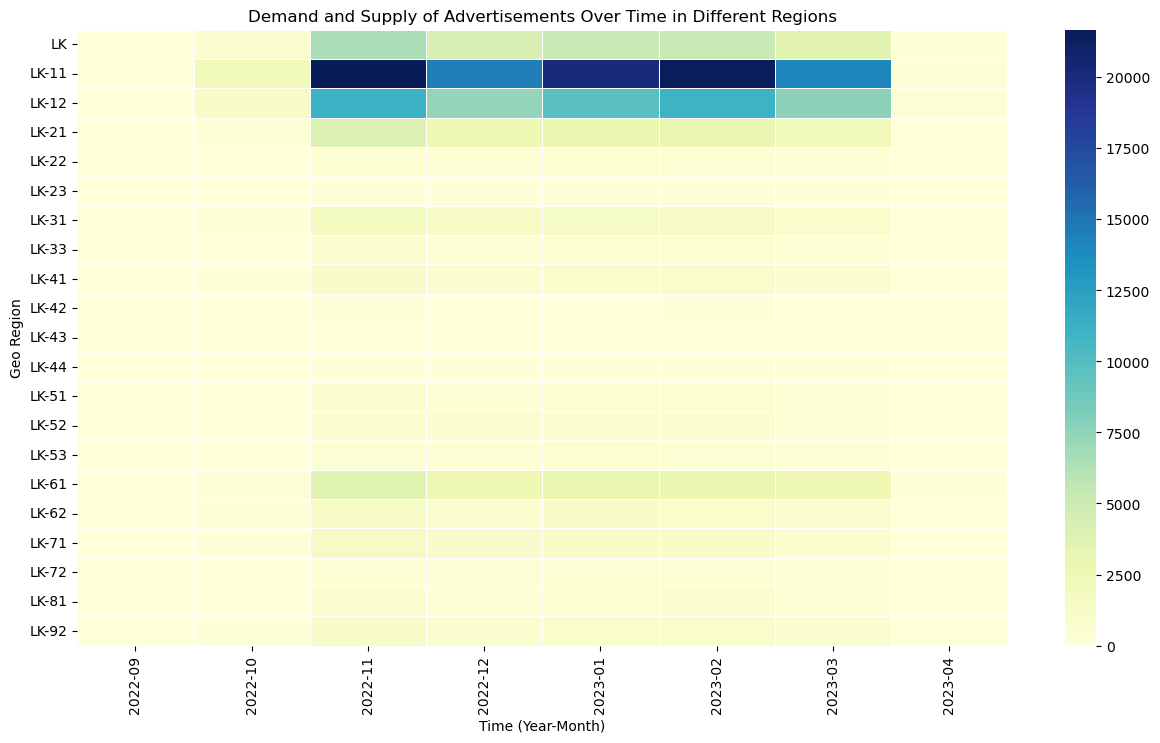

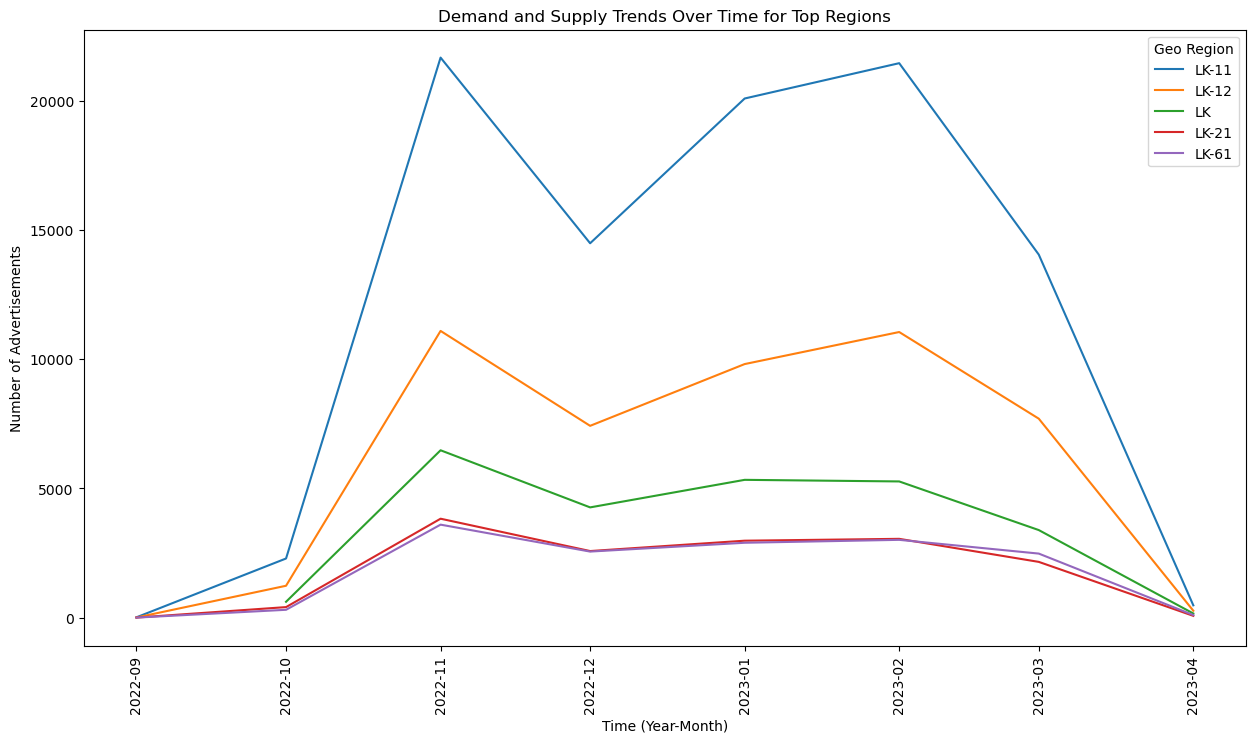

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


# Convert the 'date_posted' column to datetime format
df['posted_date'] = pd.to_datetime(df['posted_date'])

# Extract year and month from 'date_posted'
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month
df['year_month'] = df['posted_date'].dt.to_period('M')

# Select relevant columns
columns_of_interest = ['category', 'location', 'geo_region', 'year', 'month', 'year_month']

# Create a subset of the dataframe with selected columns
df_subset = df[columns_of_interest]

# Group by 'year_month' and 'geo_region' to count the number of advertisements
time_region_demand_supply = df_subset.groupby(['year_month', 'geo_region']).size().unstack(fill_value=0)

# Visualize the demand and supply over time in different regions
plt.figure(figsize=(15, 8))
sns.heatmap(time_region_demand_supply.T, cmap="YlGnBu", linewidths=.5, annot=False)
plt.title('Demand and Supply of Advertisements Over Time in Different Regions')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Geo Region')
plt.xticks(rotation=90)
plt.show()
# Visualize trends for top regions
top_regions = df['geo_region'].value_counts().head(5).index  # Get top 5 regions
plt.figure(figsize=(15, 8))
for region in top_regions:
    region_data = df_subset[df_subset['geo_region'] == region].groupby('year_month').size()
    plt.plot(region_data.index.to_timestamp(), region_data, label=region)

plt.title('Demand and Supply Trends Over Time for Top Regions')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Number of Advertisements')
plt.legend(title='Geo Region')
plt.xticks(rotation=90)
plt.show()

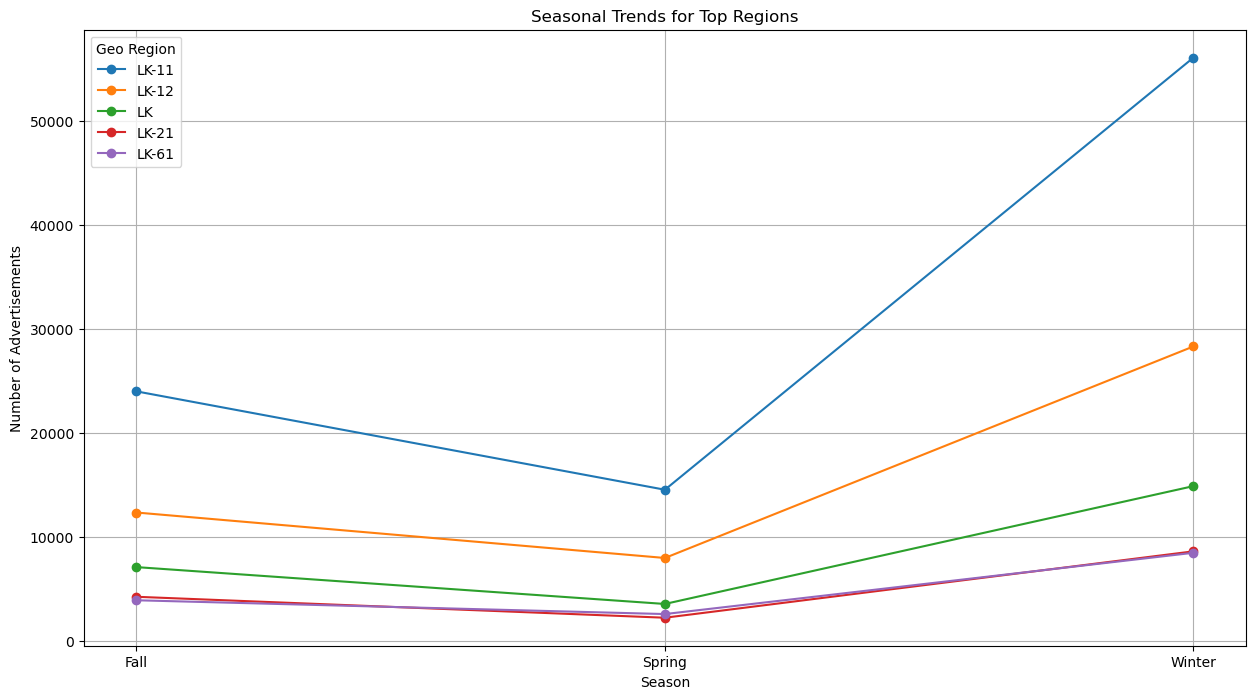

In [14]:
# Convert the 'date_posted' column to datetime format
df['posted_date'] = pd.to_datetime(df['posted_date'])

# Extract year, month, and season from 'date_posted'
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month

# Define seasons
df['season'] = df['posted_date'].dt.month % 12 // 3 + 1
df['season'] = df['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Select relevant columns
columns_of_interest = ['category', 'location', 'geo_region', 'year', 'month', 'season']

# Create a subset of the dataframe with selected columns
df_subset = df[columns_of_interest]

# Group by 'month' to count the number of advertisements and identify trends
monthly_ads = df_subset.groupby('month').size()



# Group by 'season' to count the number of advertisements and identify seasonal patterns
seasonal_ads = df_subset.groupby('season').size()


# Identify seasonal trends for top regions
plt.figure(figsize=(15, 8))
for region in top_regions:
    region_data = df_subset[df_subset['geo_region'] == region].groupby('season').size()
    plt.plot(region_data.index, region_data, marker='o', label=region)

plt.title('Seasonal Trends for Top Regions')
plt.xlabel('Season')
plt.ylabel('Number of Advertisements')
plt.legend(title='Geo Region')
plt.grid(True)
plt.show()

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Convert the 'date_posted' column to datetime format
df['posted_date'] = pd.to_datetime(df['posted_date'])

# Extract year, month, and season from 'date_posted'
df['year'] = df['posted_date'].dt.year
df['month'] = df['posted_date'].dt.month
df['season'] = df['posted_date'].dt.month % 12 // 3 + 1
df['season'] = df['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Select relevant columns for the regression model
columns_of_interest = ['category', 'location', 'geo_region', 'year', 'month', 'season']

# Create a subset of the dataframe with selected columns
df_subset = df[columns_of_interest]

# Encode categorical variables using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df_subset[['category', 'location', 'geo_region', 'season']])

# Convert the encoded features to a DataFrame
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['category', 'location', 'geo_region', 'season']))

# Combine the encoded features with the numerical columns
df_encoded = pd.concat([df_subset[['year', 'month']], encoded_features_df], axis=1)

# Create the target variable 'demand_supply'
# Assuming 'demand_supply' is represented by the count of advertisements
df_encoded['demand_supply'] = 1

# Aggregate the data by the features to create the target variable
df_aggregated = df_encoded.groupby(df_encoded.columns.tolist()[:-1]).sum().reset_index()

# Define the features (X) and the target (y)
X = df_aggregated.drop(columns='demand_supply')
y = df_aggregated['demand_supply']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display first few predictions vs actual values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())


C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_9504\3617916712.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_aggregated = df_encoded.groupby(df_encoded.columns.tolist()[:-1]).sum().reset_index()
C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_9504\3617916712.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_aggregated = df_encoded.groupby(df_encoded.columns.tolist()[:-1]).sum().reset_index()
C:\Users\Kuldeep\AppData\Local\Temp\ipykernel_9504\3617916712.py:38: PerformanceWarning: DataFrame is highly fragmented.  This

Mean Squared Error: 2130.439405402472
R-squared: 0.1472203351261614
       Actual  Predicted
2609       35   2.992188
4045        2   5.433105
6128       13  24.954590
12683       1 -13.045410
12344       1 -13.402832
